In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# HealthCare

## Data Preprocessing

In [ ]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df1 = df1.drop('id', axis = 1)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df1.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [ ]:
df1.dropna(inplace = True)

In [ ]:
df1.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
df1.nunique()

,0
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3852
bmi,418
smoking_status,4


## Visualization

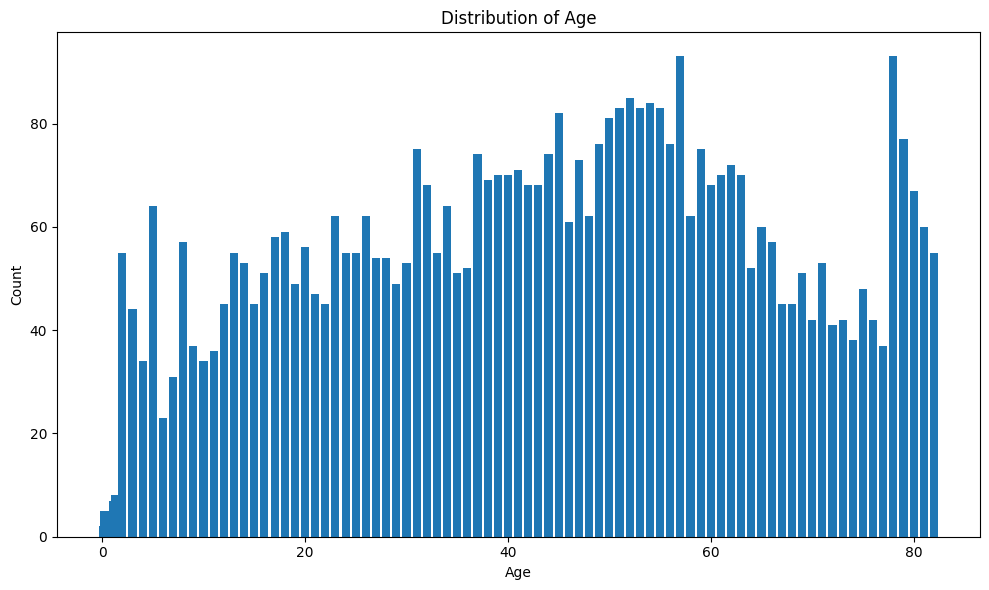

In [ ]:
age_counts = df1['age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

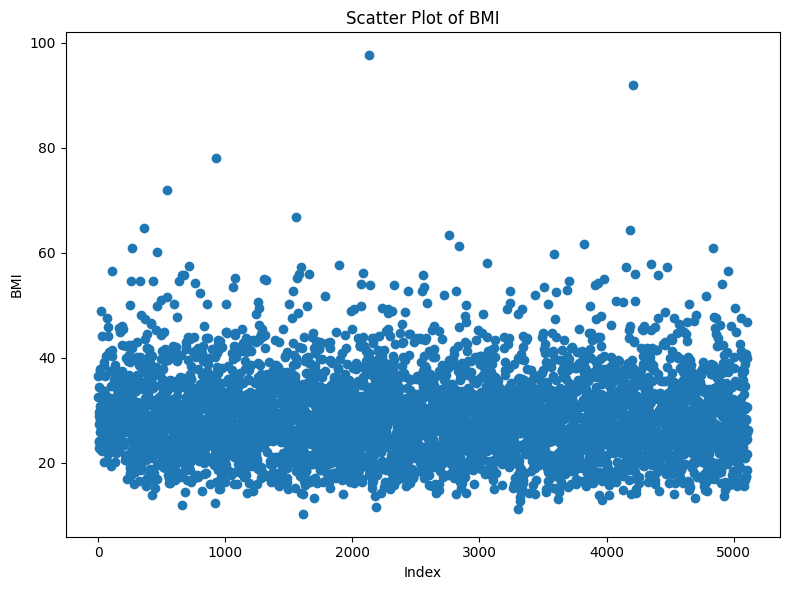

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df1.index, df1['bmi'])
plt.title('Scatter Plot of BMI')
plt.xlabel('Index')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

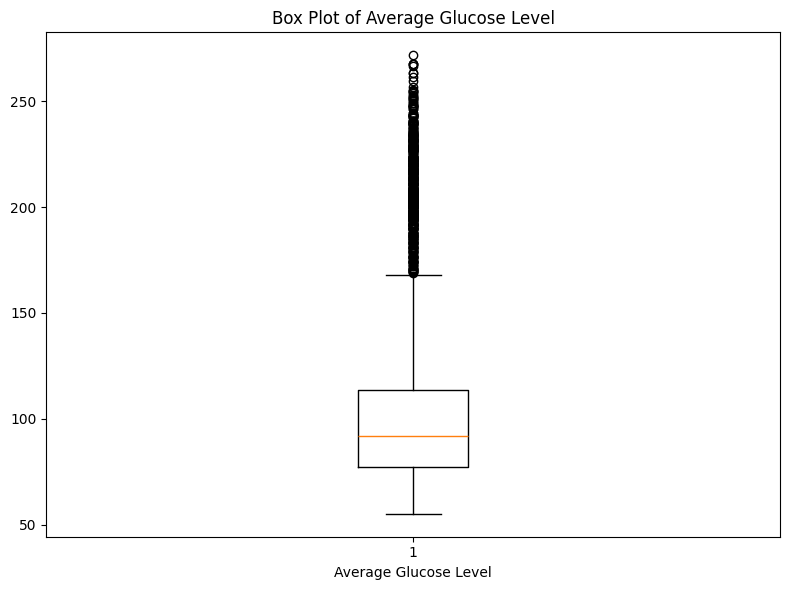

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df1['avg_glucose_level'])
plt.title('Box Plot of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.tight_layout()
plt.show()

## KNN Library

In [ ]:
categorical_cols = ['ever_married', 'Residence_type', 'smoking_status']

label_encoder = LabelEncoder()

for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

In [ ]:
df1 = pd.get_dummies(df1, columns=['gender', 'work_type'], prefix=['gender', 'work_type'], dtype=int)

In [ ]:
X = df1.drop('stroke', axis=1)
y = df1['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
df1

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_0,gender_1,gender_2,work_type_0,work_type_1,work_type_2,work_type_3,work_type_4
0,67.0,0,1,1,1,228.69,36.6,1,1,0,1,0,0,0,1,0,0
2,80.0,0,1,1,0,105.92,32.5,2,1,0,1,0,0,0,1,0,0
3,49.0,0,0,1,1,171.23,34.4,3,1,1,0,0,0,0,1,0,0
4,79.0,1,0,1,0,174.12,24.0,2,1,1,0,0,0,0,0,1,0
5,81.0,0,0,1,1,186.21,29.0,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,0,0,103.08,18.6,0,0,1,0,0,0,0,0,0,1
5106,81.0,0,0,1,1,125.20,40.0,2,0,1,0,0,0,0,0,1,0
5107,35.0,0,0,1,0,82.99,30.6,2,0,1,0,0,0,0,0,1,0
5108,51.0,0,0,1,0,166.29,25.6,1,0,0,1,0,0,0,1,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   hypertension       4909 non-null   int64  
 2   heart_disease      4909 non-null   int64  
 3   ever_married       4909 non-null   int64  
 4   Residence_type     4909 non-null   int64  
 5   avg_glucose_level  4909 non-null   float64
 6   bmi                4909 non-null   float64
 7   smoking_status     4909 non-null   int64  
 8   stroke             4909 non-null   int64  
 9   gender_0           4909 non-null   int64  
 10  gender_1           4909 non-null   int64  
 11  gender_2           4909 non-null   int64  
 12  work_type_0        4909 non-null   int64  
 13  work_type_1        4909 non-null   int64  
 14  work_type_2        4909 non-null   int64  
 15  work_type_3        4909 non-null   int64  
 16  work_type_4        4909 non-n

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn_library_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_library_accuracy)

Accuracy:  0.9429967426710097


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
knn_library_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", knn_library_accuracy)

Accuracy:  0.9486970684039088


## KNN Scratch

In [ ]:
df1 = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
df1 = df1.drop('id', axis = 1)
df1.dropna(inplace = True)

In [ ]:
df1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

In [ ]:
def euclidean_distance(x1, x2):
    x1 = np.array(x1, dtype=np.float64)
    x2 = np.array(x2, dtype=np.float64)
    return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X.values]
        return np.array(predicted_labels)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train.values]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]

        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


In [ ]:
knn = KNN(k=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
knn_scratch_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",knn_scratch_accuracy)

In [ ]:
knn = KNN(k=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
knn_scratch_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",knn_scratch_accuracy)

## Accuracy Comparison

In [ ]:
print("KNN Scratch Accuracy:", knn_scratch_accuracy)
print("KNN Library Accuracy:",knn_library_accuracy)

In [ ]:
models = ['KNN Scratch', 'KNN Library']
accuracies = [knn_scratch_accuracy, knn_library_accuracy]

plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison: KNN Scratch vs. KNN Library')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()